In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mlxtend.classifier import EnsembleVoteClassifier

In [2]:
# creating a dir. to store project images
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "Diabetes_Ensemble_Tech"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Creating a function to save generated figures in the above dir.

def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
    print("Figure saved")

In [3]:
# read the csv file 
df = pd.read_csv("D:\\DataSc\\Datasets\\health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Before diving deep into the project, let's understand the problem statement and the data given to us.
# Our Objective: build a model to accurately predict whether the patients in the dataset have diabetes or not?
# Dataset: Available in the project GitHub dir.

# The datasets consists of several medical predictor variables and one target variable, Outcome.
# Predictors:
#     Pregnancies: Number of times pregnant
#     Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#     BloodPressure: Diastolic blood pressure (mm Hg)
#     SkinThickness: Triceps skin fold thickness (mm)
#     Insulin: 2-Hour serum insulin (mu U/ml)
#     BMI: Body mass index (weight in kg/(height in m)^2)
#     DiabetesPedigreeFunction: Diabetes pedigree function
#     Age: Age (years)
#     Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# From the data description we can clearly point out some of the features and make certain assumptions:
# The data set is not normalized i.e different feature(variable) have different unit of measurements, We will need to Standardize the dataset
# Based on 8 features/variables we have to predict the "Outcome"(Traget variable)

In [5]:
# Let's start with our data given to us. First things first, let's look the data distribution and description to get more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# We can see BMI and DiabetesPedigreeFunction are in floats, and the rest of variales are in integer, which is good!
# Also we do not have categorical values as predictors(feature variables)
# Outcome may be classified as a nominal variable. There is no particular order, and the outcome is whether the patient
# has diabetes(Outcome == 1), or not(Outcome == 0)

# Problem Type: Classification problem

In [8]:
# Let's get the value count of the Traget variable
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# Now, let's explore the data and perform EDA to prepare the dataset of ML
# But, before that let's create a dummy Train_Test datasets and put them aside for future use/reference

# import library
from sklearn.model_selection import train_test_split

# Creating a dummy DataFrame 
df_dumy = df.copy()
df_dumy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Creating a dummy train and test set from our dummy DataFrame
X_dumy = df_dumy.iloc[:, :-1]
y_dumy = df_dumy.Outcome

X_train_dumy, X_test_dumy, y_train_dumy, y_test_dumy = train_test_split(X_dumy, y_dumy, test_size=0.3, random_state=42)
# We have created a dummy train and test sets, we'll use them later! For now let's continue our EDA

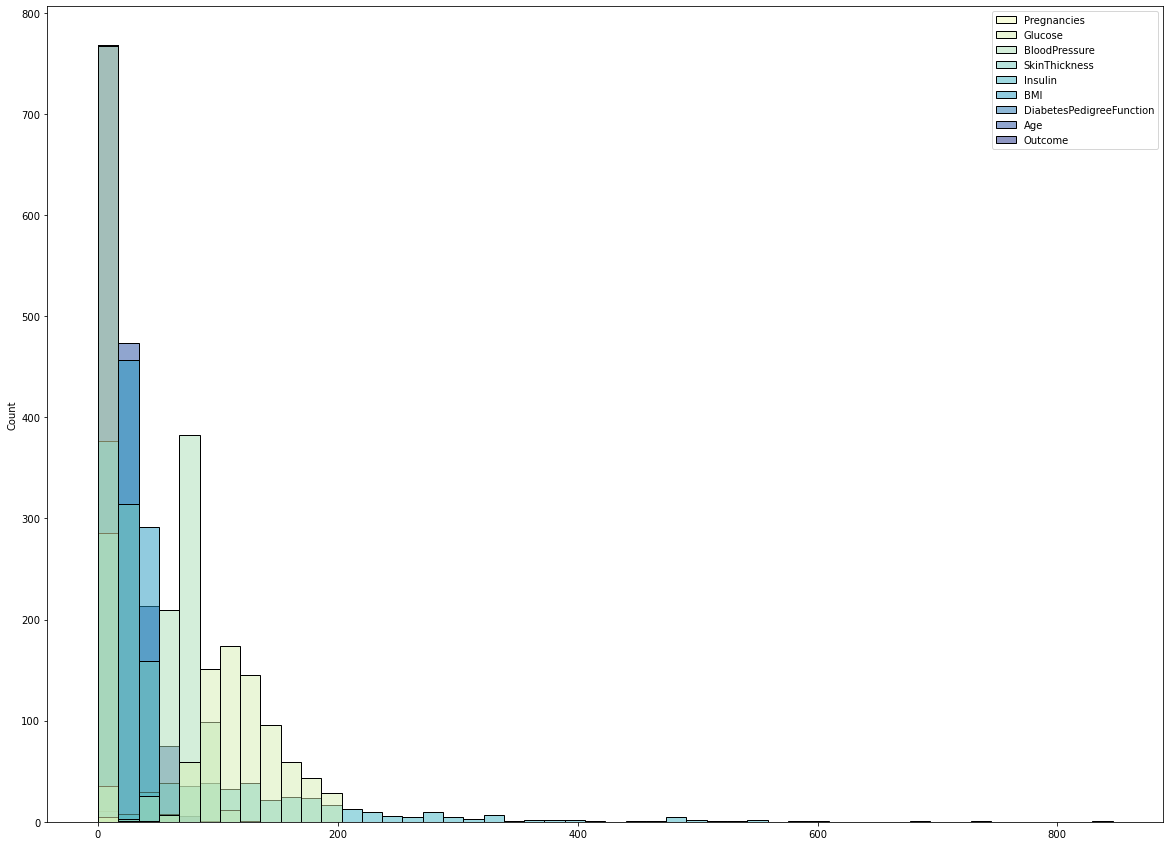

Figure saved


<Figure size 432x288 with 0 Axes>

In [11]:
# Let's use the hist feature of matplotlib to map-out all the variables against each other
%matplotlib inline
figure, axes = plt.subplots(figsize=(20, 15))
sns.histplot(data=df, palette="YlGnBu", bins=50)
plt.show()
plt.tight_layout()
save_fig('Features histogram')

Figure saved


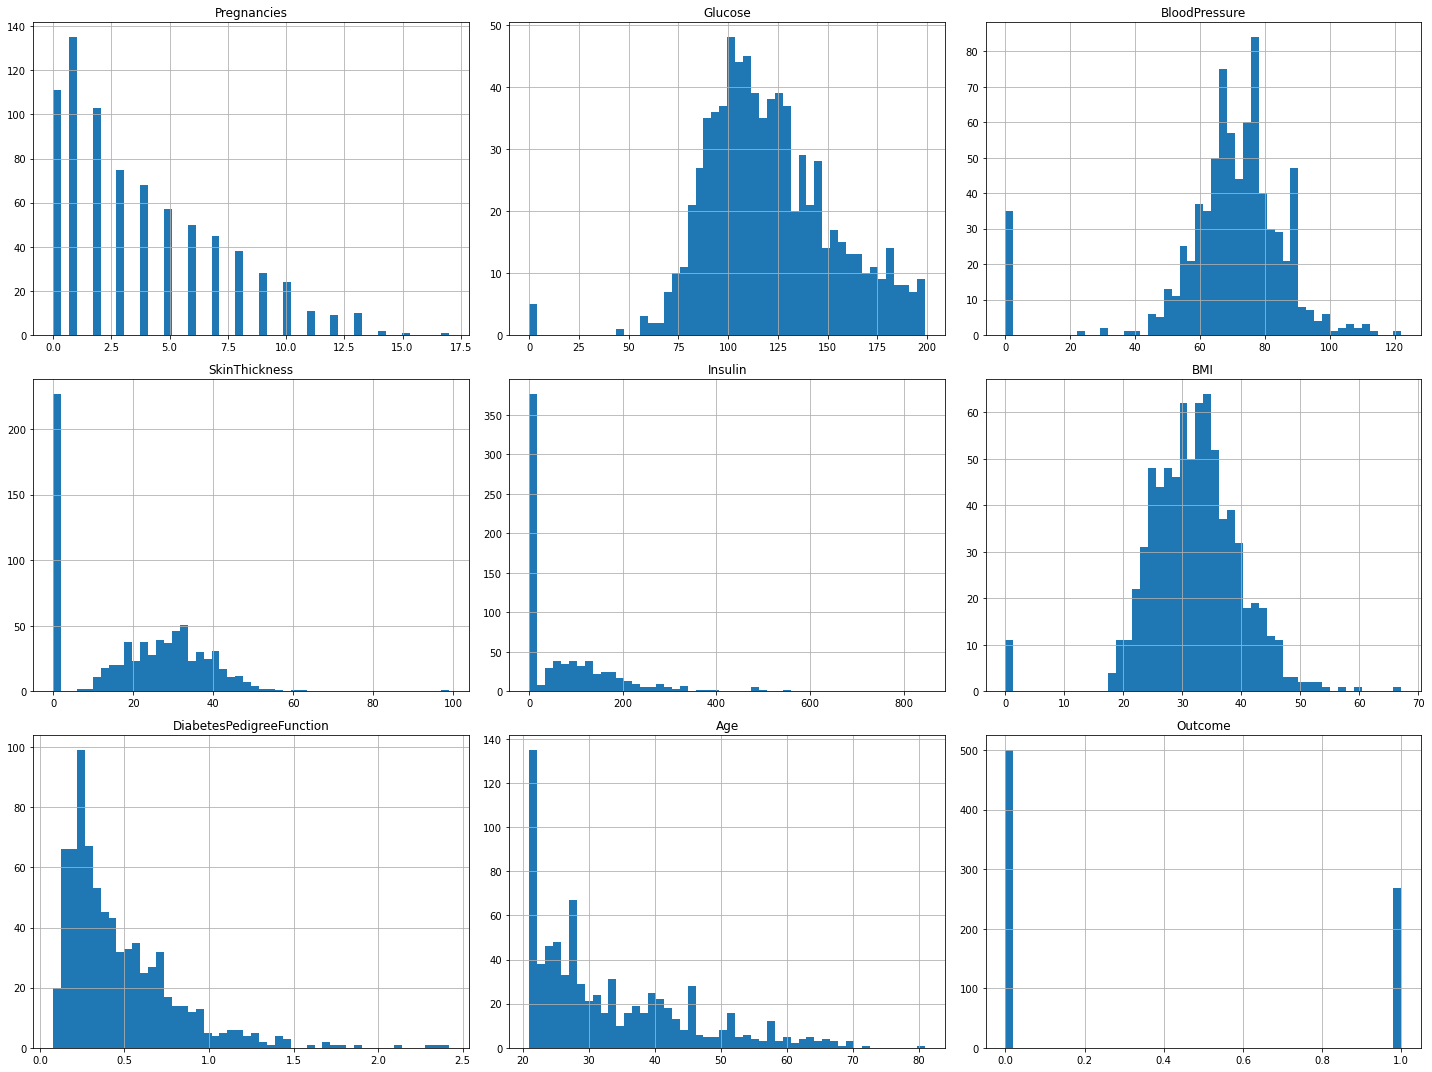

<Figure size 432x288 with 0 Axes>

In [12]:
# Let's use the hist feature of matplotlib to map-out all the variables against each other
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
save_fig("Attribute histo-plots")
plt.show()
plt.tight_layout()

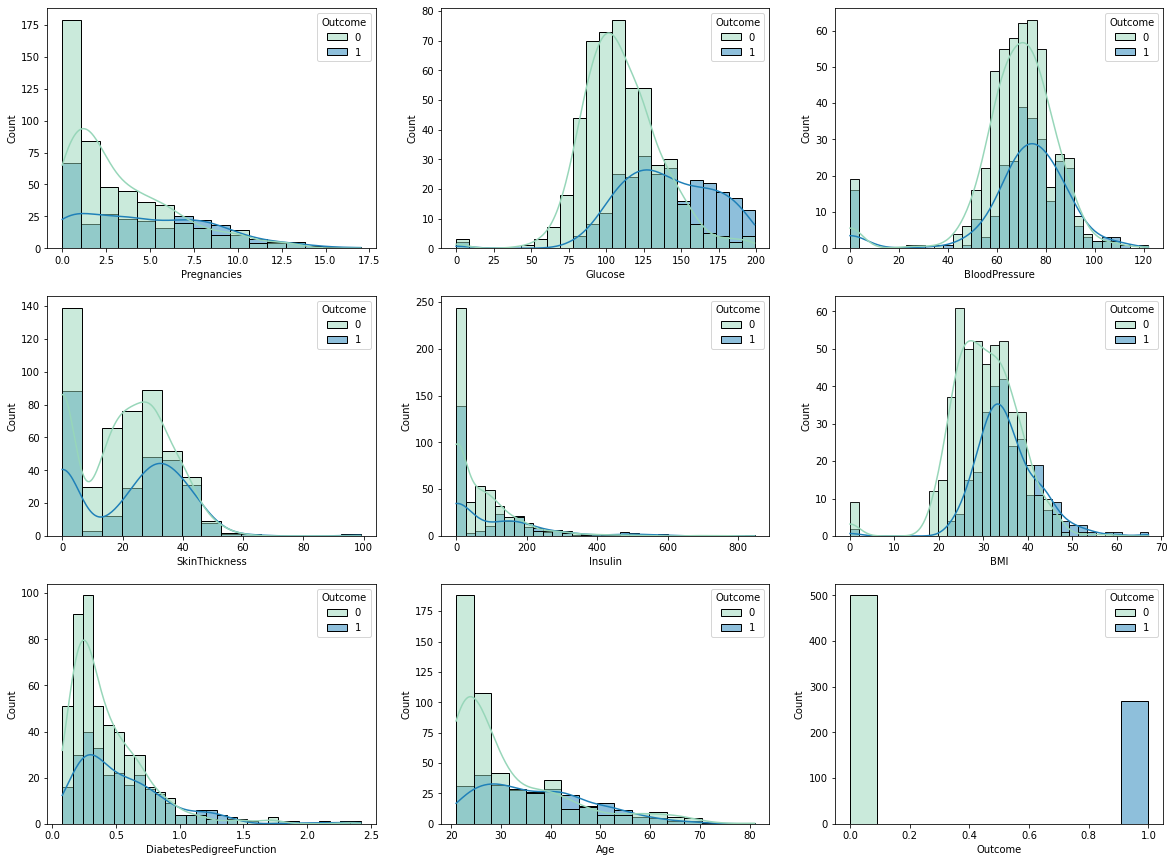

Figure saved


<Figure size 432x288 with 0 Axes>

In [13]:
figure, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.histplot(data=df, x=df.Pregnancies, hue="Outcome", ax=axes[0,0], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Glucose, hue="Outcome", ax=axes[0,1], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.BloodPressure, hue="Outcome", ax=axes[0,2], kde=True, palette="YlGnBu")

sns.histplot(data=df, x=df.SkinThickness, hue="Outcome", ax=axes[1,0], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Insulin, hue="Outcome", ax=axes[1,1], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.BMI, hue="Outcome", ax=axes[1,2], kde=True, palette="YlGnBu")

sns.histplot(data=df, x=df.DiabetesPedigreeFunction, hue="Outcome", ax=axes[2,0], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Age, hue="Outcome", ax=axes[2,1], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Outcome, hue="Outcome", ax=axes[2,2], kde=True, palette="YlGnBu")

plt.show()
plt.tight_layout()
save_fig('Histogram- all plots')

In [14]:
# We can see our given data is some-what good. Well, it's a good dataset! But it can be better/improvised!
# Note 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' have a lot of zero(0)'s count, which can be problem for our ML process.
# We should stratergise to remove or replace these zero-values in the datasets or our models and predictions will be low!
# A GOOD DATA SET is ALWAYS better than a good or improvised model, so data has be handled carefully here!

# Let's deal with the zeros first!
# find the numbers of zeros is the above columns
miss = []
for col in df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]:
    percent = df[[col]].eq(0).sum()*100/df.shape[0]
    miss.append(percent)
    
print(miss)

[Glucose    0.651042
dtype: float64, BloodPressure    4.557292
dtype: float64, SkinThickness    29.557292
dtype: float64, Insulin    48.697917
dtype: float64, BMI    1.432292
dtype: float64]


In [15]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [16]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [17]:
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [18]:
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [20]:
# Glucose columns has 0.65%, BloodPressure has 4.55%, SkinThickness has 29.55%, Insulin has 48.69%, and BMI has 1.4% data as zeros
# let's replace these zero with NaN-type. It will become easier to manipulate the data!
df.replace({"Glucose":0, "BloodPressure":0, "SkinThickness":0, "Insulin":0, "BMI":0}, np.nan, inplace = True)

print(df.isna().sum(),"\n")
print(df.isna().sum()*100/df.shape[0])

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64 

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


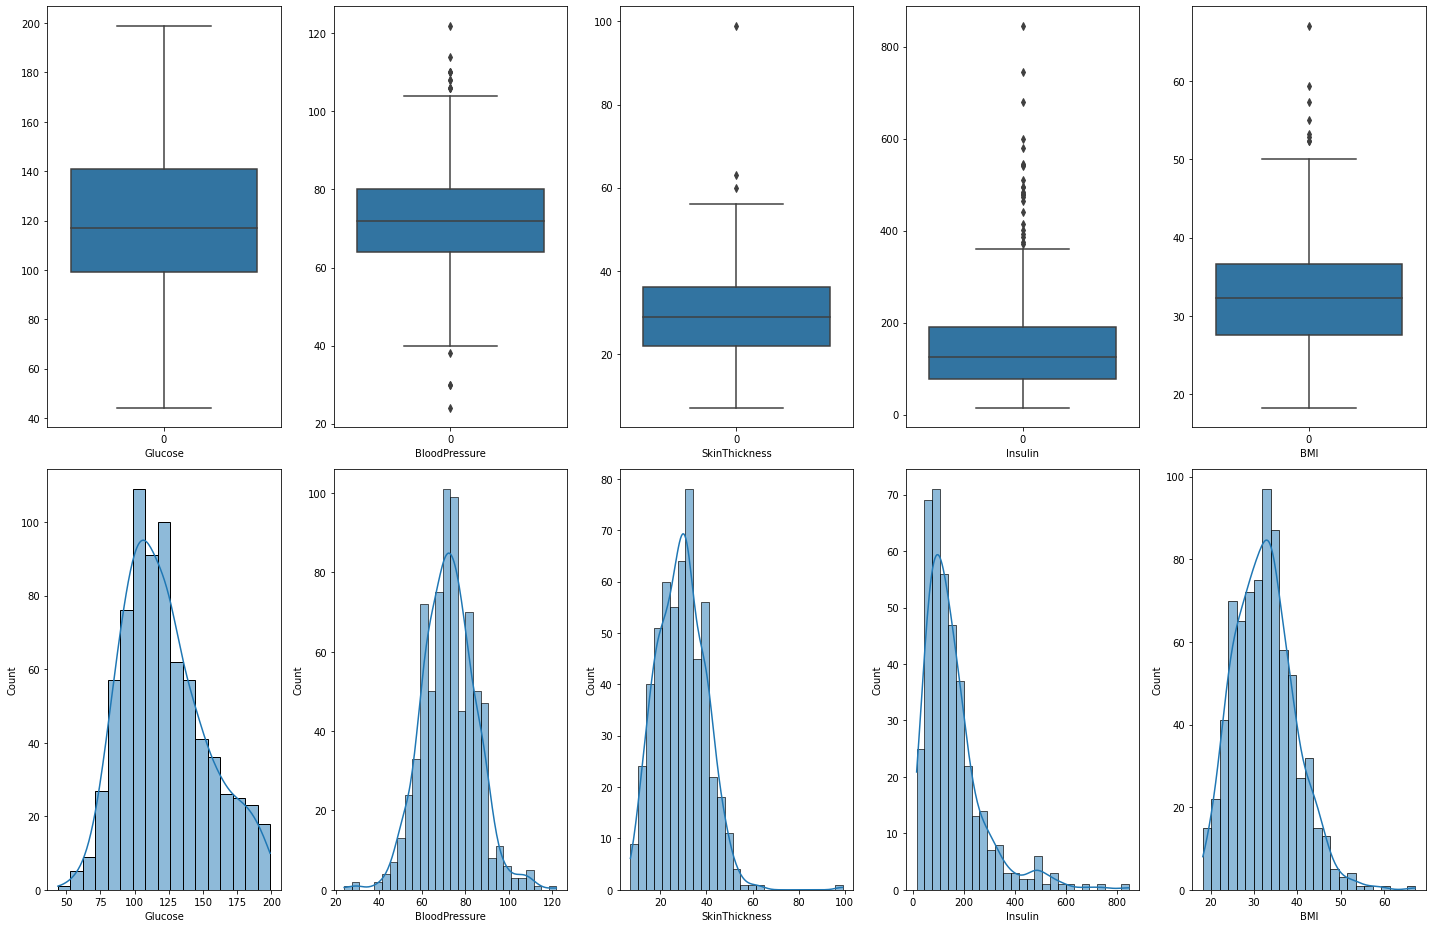

Figure saved


<Figure size 432x288 with 0 Axes>

In [21]:
# We have replace our zeros with NaNs, and can see that the data has the same missing percentage as before!
# Let's replace or remove these NaNs
# Let's create Box-Plots and histogram with our selected features to get a better insight!

# Plotting Box-plots and histogram
figure, axes = plt.subplots(2, 5, figsize=(20, 13))
sns.boxplot(data=df["Glucose"], ax=axes[0,0]).set(xlabel = "Glucose")
sns.boxplot(data=df["BloodPressure"], ax=axes[0,1]).set(xlabel = "BloodPressure")
sns.boxplot(data=df["SkinThickness"], ax=axes[0,2]).set(xlabel = "SkinThickness")
sns.boxplot(data=df["Insulin"], ax=axes[0,3]).set(xlabel = "Insulin")
sns.boxplot(data=df["BMI"], ax=axes[0,4]).set(xlabel = "BMI")

sns.histplot(data=df["Glucose"], kde=True, ax=axes[1,0]).set(xlabel = "Glucose")
sns.histplot(data=df["BloodPressure"], kde=True, ax=axes[1,1]).set(xlabel = "BloodPressure")
sns.histplot(data=df["SkinThickness"], kde=True, ax=axes[1,2]).set(xlabel = "SkinThickness")
sns.histplot(data=df["Insulin"], kde=True, ax=axes[1,3]).set(xlabel = "Insulin")
sns.histplot(data=df["BMI"], kde=True, ax=axes[1,4]).set(xlabel = "BMI")

plt.tight_layout()
plt.show()
save_fig('Box and Histo plots-all features')

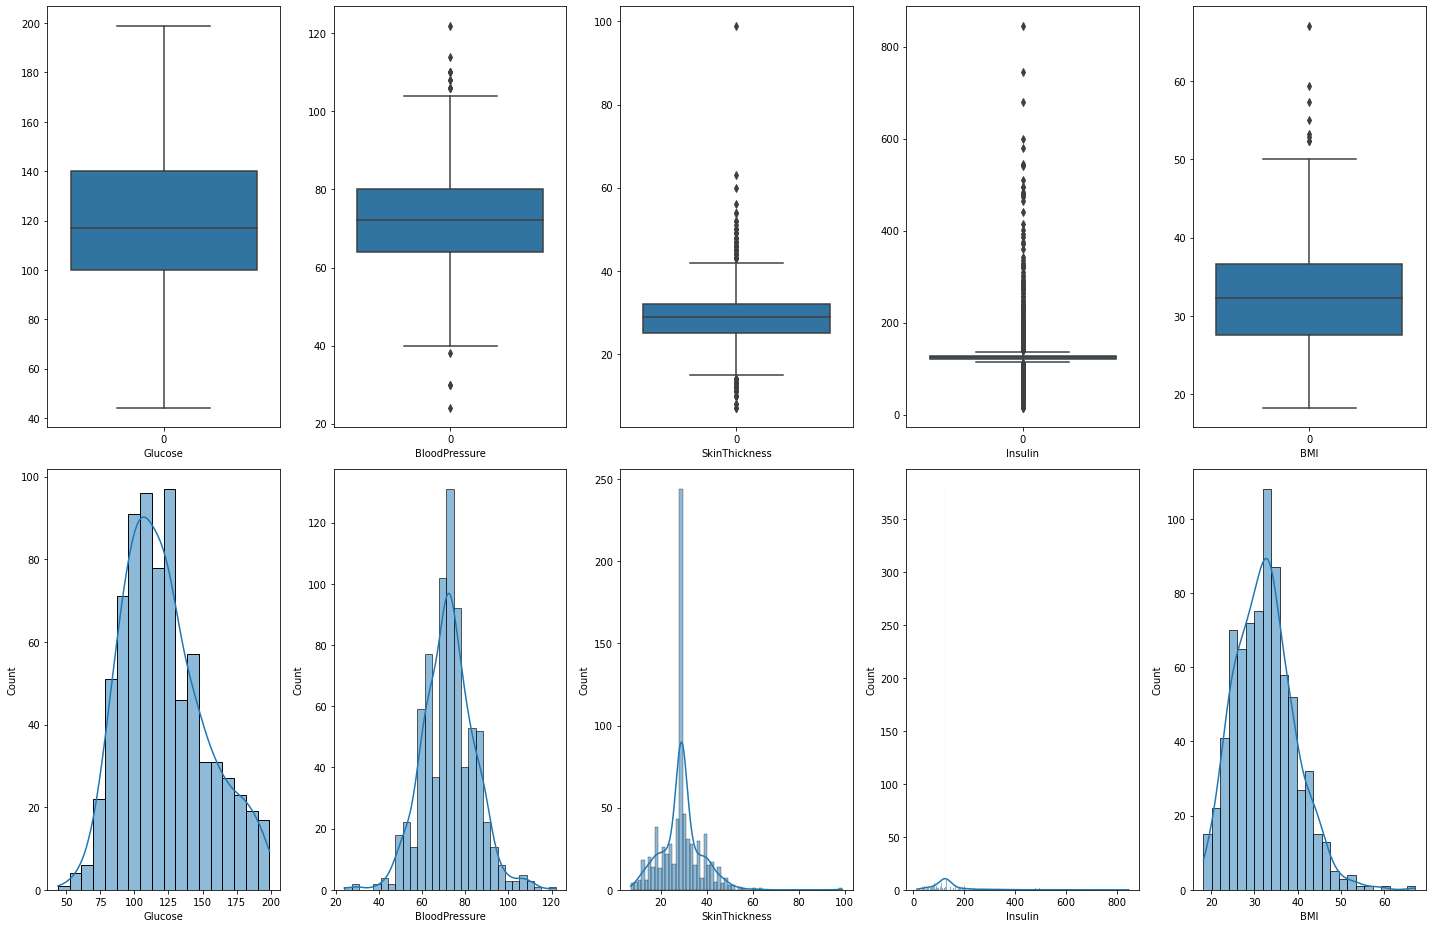

Figure saved


<Figure size 432x288 with 0 Axes>

In [22]:
# Glucose columns has 0.65%, BloodPressure has 4.55%, SkinThickness has 29.55%, Insulin has 48.69%, and BMI has 1.4% data as zeros
# Based on the skweness and outliers present on the graphs, Median can be imputed in 'BloodPressure', 'SkinThickness', 
# 'Insulin', and 'BMI'. While median could also be inputed in Glucose feature, but since it is more normaly distributed from
# the other graphs(expect BP), and only 0.6% of the data is missing; Mean could be imputed here.

# Replace NaNs with mean in Glucose column!
from sklearn.impute import SimpleImputer

# Replace NaNs with median in the rest of the column
for col in df[['BloodPressure', 'Glucose']]:
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(df[[col]])
    df[col] = imputer.transform(df[[col]])

# Replace NaNs with median in the rest of the column
for col in df[['SkinThickness','Insulin','BMI']]:
    imputer = SimpleImputer(strategy='median', missing_values=np.nan)
    imputer = imputer.fit(df[[col]])
    df[col] = imputer.transform(df[[col]])
    
figure, axes = plt.subplots(2, 5, figsize=(20, 13))
sns.boxplot(data=df["Glucose"], ax=axes[0,0]).set(xlabel = "Glucose")
sns.boxplot(data=df["BloodPressure"], ax=axes[0,1]).set(xlabel = "BloodPressure")
sns.boxplot(data=df["SkinThickness"], ax=axes[0,2]).set(xlabel = "SkinThickness")
sns.boxplot(data=df["Insulin"], ax=axes[0,3]).set(xlabel = "Insulin")
sns.boxplot(data=df["BMI"], ax=axes[0,4]).set(xlabel = "BMI")

sns.histplot(data=df["Glucose"], kde=True, ax=axes[1,0]).set(xlabel = "Glucose")
sns.histplot(data=df["BloodPressure"], kde=True, ax=axes[1,1]).set(xlabel = "BloodPressure")
sns.histplot(data=df["SkinThickness"], kde=True, ax=axes[1,2]).set(xlabel = "SkinThickness")
sns.histplot(data=df["Insulin"], kde=True, ax=axes[1,3]).set(xlabel = "Insulin")
sns.histplot(data=df["BMI"], kde=True, ax=axes[1,4]).set(xlabel = "BMI")

plt.tight_layout()
plt.show()
save_fig('Box and Histo plots-all features after imputations')

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


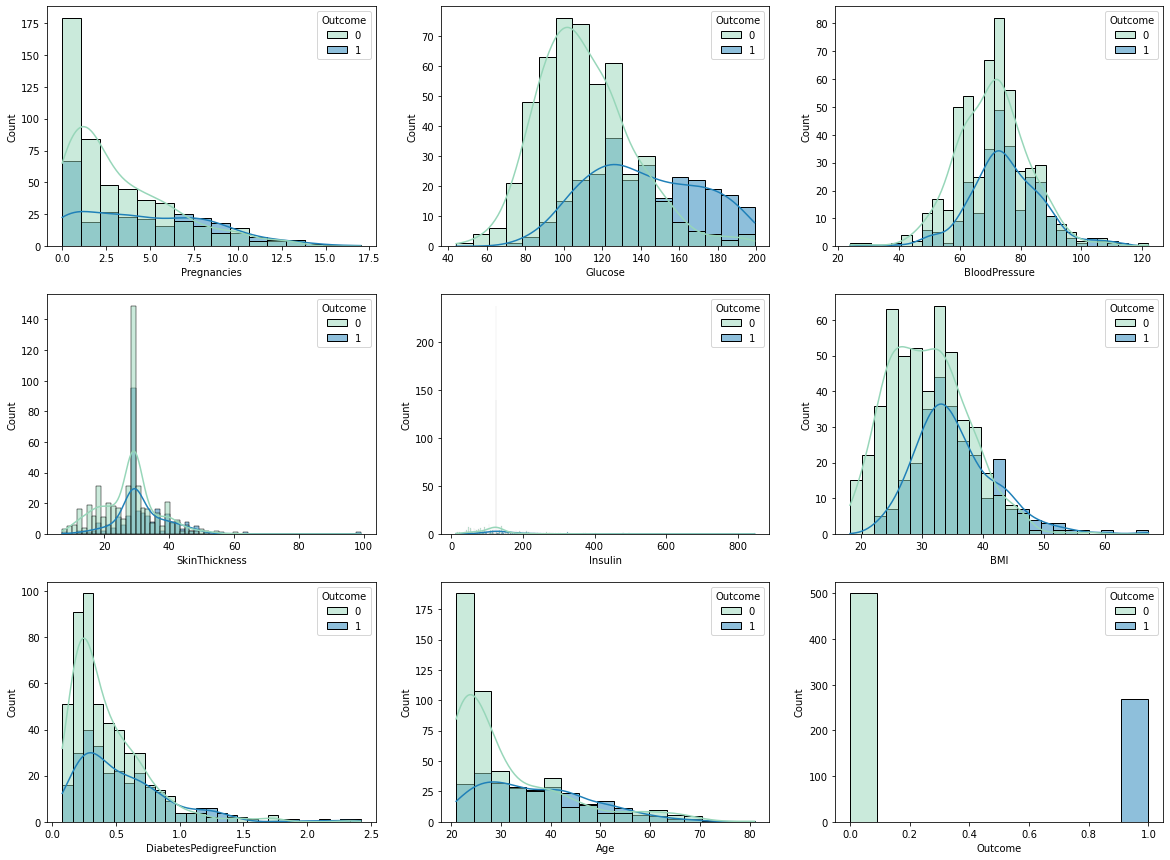

Figure saved


<Figure size 432x288 with 0 Axes>

In [24]:
figure, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.histplot(data=df, x=df.Pregnancies, hue="Outcome", ax=axes[0,0], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Glucose, hue="Outcome", ax=axes[0,1], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.BloodPressure, hue="Outcome", ax=axes[0,2], kde=True, palette="YlGnBu")

sns.histplot(data=df, x=df.SkinThickness, hue="Outcome", ax=axes[1,0], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Insulin, hue="Outcome", ax=axes[1,1], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.BMI, hue="Outcome", ax=axes[1,2], kde=True, palette="YlGnBu")

sns.histplot(data=df, x=df.DiabetesPedigreeFunction, hue="Outcome", ax=axes[2,0], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Age, hue="Outcome", ax=axes[2,1], kde=True, palette="YlGnBu")
sns.histplot(data=df, x=df.Outcome, hue="Outcome", ax=axes[2,2], kde=True, palette="YlGnBu")

plt.show()
plt.tight_layout()
save_fig('Box and Histo plots-all features based on the Outcome(target) feature')

In [25]:
df.shape

(768, 9)

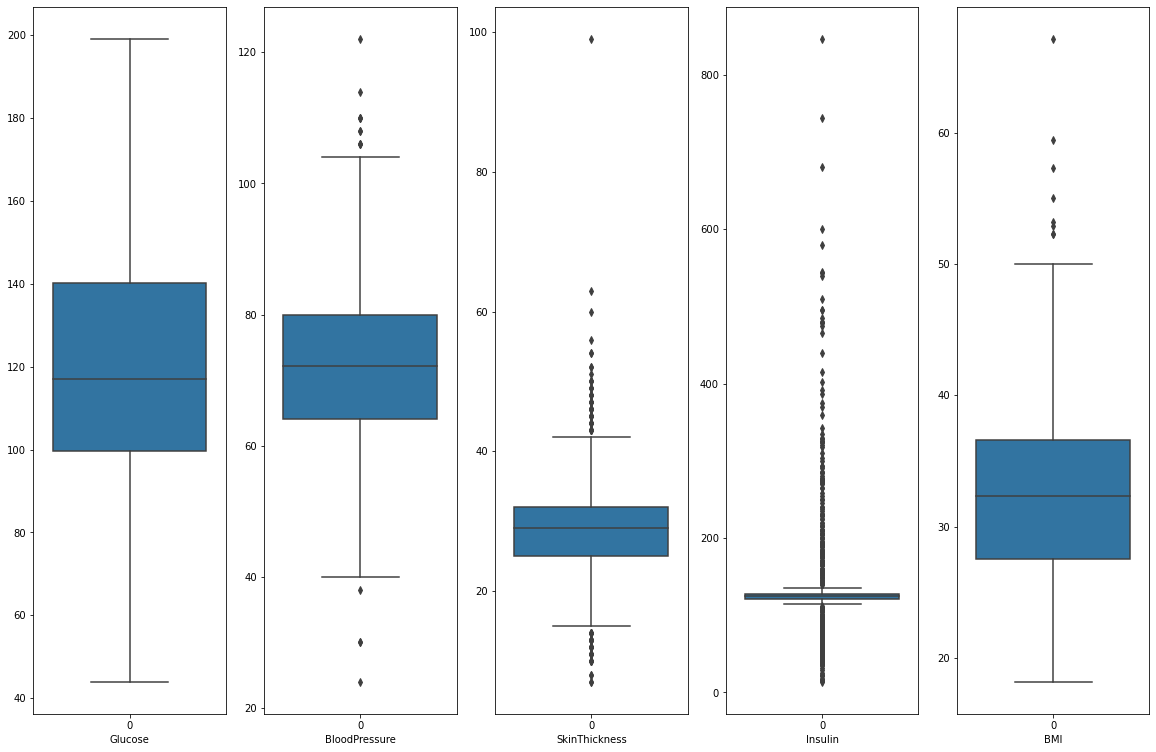

Figure saved


<Figure size 432x288 with 0 Axes>

In [26]:
figure, axes = plt.subplots(1, 5, figsize=(20, 13))

sns.boxplot(data=df["Glucose"], ax=axes[0]).set(xlabel = "Glucose")
sns.boxplot(data=df["BloodPressure"], ax=axes[1]).set(xlabel = "BloodPressure")
sns.boxplot(data=df["SkinThickness"], ax=axes[2]).set(xlabel = "SkinThickness")
sns.boxplot(data=df["Insulin"], ax=axes[3]).set(xlabel = "Insulin")
sns.boxplot(data=df["BMI"], ax=axes[4]).set(xlabel = "BMI")

plt.show()
plt.tight_layout()
save_fig('Box-plot of all features')

In [27]:
# We can see that our dataset has a lot outliers!
# We can remove them, but since we don't have a lot of data(i.e we have 768 records), we have select the top 3 feature based on 
#-Decision Tree or Random Forest feature importance and remove the outliers based on those features!

In [28]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
# Let's create create a correlation matrix and graph to understand the data better
# Correlation Matrix
corr_matx = df.corr()
corr_matx

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Figure saved


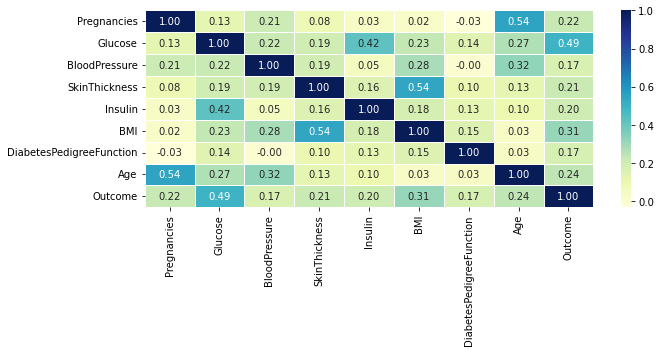

In [30]:
# Plot the matrix
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.heatmap(corr_matx, annot = True, cmap = 'YlGnBu', cbar = True, linewidths = 0.5, fmt = ".2f")
plt.tight_layout()
save_fig("Correlational Matrix")

In [31]:
# We can see the correlation between Outcome and other features
corr_matx["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

Figure saved


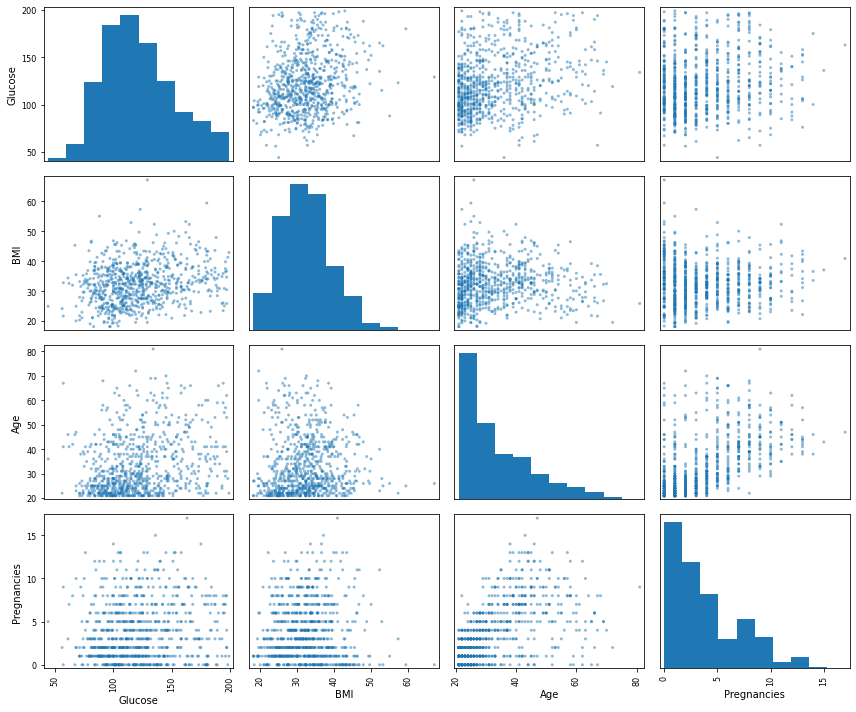

In [32]:
from pandas.plotting import scatter_matrix

# Based on the above correlation values
feat_four = ["Glucose", "BMI", "Age", "Pregnancies"]
feat_five = ["Glucose", "BMI", "Age", "Pregnancies", "SkinThickness"]

scatter_matrix(df[feat_four], figsize = (12, 10))
plt.tight_layout()
save_fig('Scatter plot- Top 4 features')

Figure saved


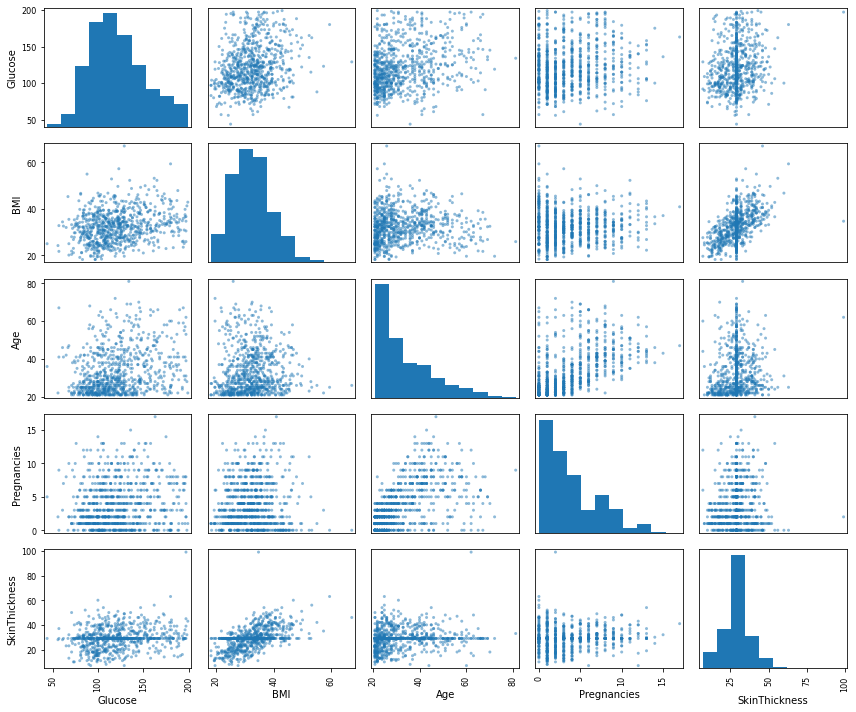

In [33]:
scatter_matrix(df[feat_five], figsize = (12, 10))
plt.tight_layout()
save_fig('Scatter plot- Top 5 features')

In [34]:
# Based on the correlation matrix and pair-plots, exclusive feature selection can help us to build a better model!
# Let's use all the features to build our 1st model
X = df.drop('Outcome', axis=1)
y = df.Outcome

In [35]:
# Let's Standardize the data first. Features with high coeffient/weights may favor those specific features! 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [36]:
# Let's create Train & Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70%->Training, 30%->Testing

In [37]:
# Model selection and more!
# Let's create a Baseline model first. We will use [Logistic Regression], [Random Forest], [Support Vector Machine], [KNeighbors]
# [Decision Tree], [Ada Boost], and [Gradient Boosting] classifiers first, and select the model with the most accuracy!

# import libraries
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

LR = LogisticRegression(random_state=2022)
RF = RandomForestClassifier(n_estimators = 100, random_state=2022)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)

10-fold Kross validation:

Train cv accuracy:   0.77 (+/- 0.05) [Logistic Regression]
Test accuracy    :   0.77


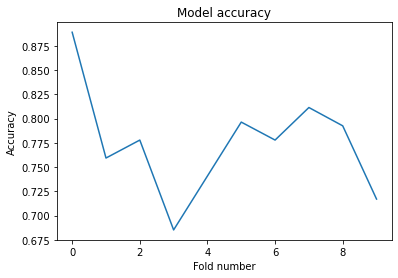

Train cv accuracy:   0.77 (+/- 0.04) [Random Forest]
Test accuracy    :   1.00


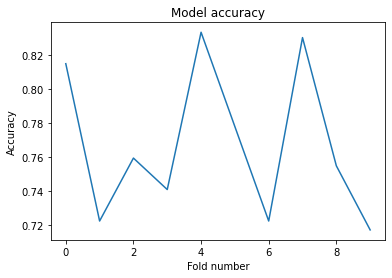

Train cv accuracy:   0.75 (+/- 0.05) [Support Vector Machine]
Test accuracy    :   0.82


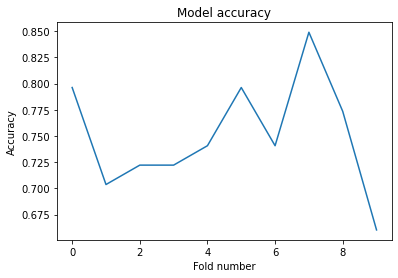

Train cv accuracy:   0.76 (+/- 0.06) [KNeighbors]
Test accuracy    :   0.79


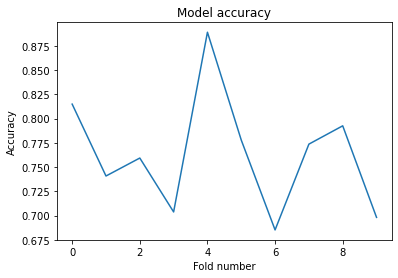

Train cv accuracy:   0.71 (+/- 0.08) [Decision Tree]
Test accuracy    :   1.00


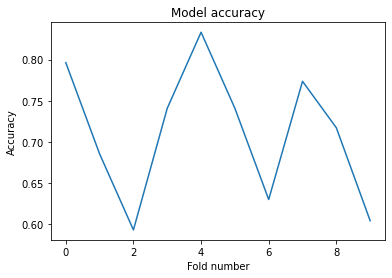

Train cv accuracy:   0.76 (+/- 0.06) [Ada Boost]
Test accuracy    :   0.81


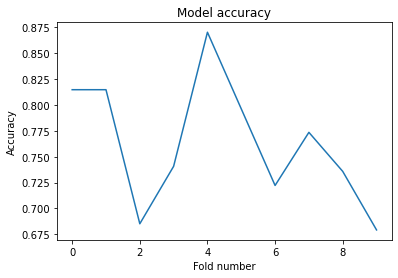

Train cv accuracy:   0.78 (+/- 0.04) [Gradient Boosting]
Test accuracy    :   0.90


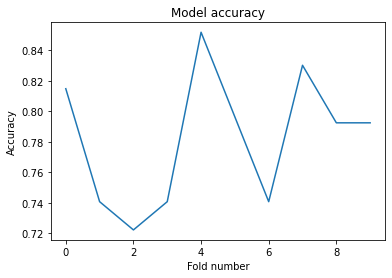

In [38]:
# Using Stratified K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=41) # 10 number of iterartions

class_name = []
score = []
clfs = []
class_score_df = pd.DataFrame()

print('10-fold Kross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, GBC], ['Logistic Regression', 
                                                              'Random Forest', 
                                                              'Support Vector Machine', 
                                                              'KNeighbors', 
                                                              'Decision Tree', 
                                                              'Ada Boost',
                                                              'Gradient Boosting']):
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Train cv accuracy:   %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label))
    md = clf.fit(X, y)
    clfs.append(md)
    print("Test accuracy    :   %0.2f" %(metrics.accuracy_score(clf.predict(X_test), y_test)))
    class_name.append(label)
    score.append(scores.mean())
    g = sns.lineplot(data=scores).set(xlabel='Fold number', ylabel='Accuracy', title='Model accuracy')
    plt.show(g)

               Classifier  TrainScore
0     Logistic Regression    0.774668
1           Random Forest    0.767226
2  Support Vector Machine    0.750524
3              KNeighbors    0.763452
4           Decision Tree    0.711286
5               Ada Boost    0.763312
6       Gradient Boosting    0.782250


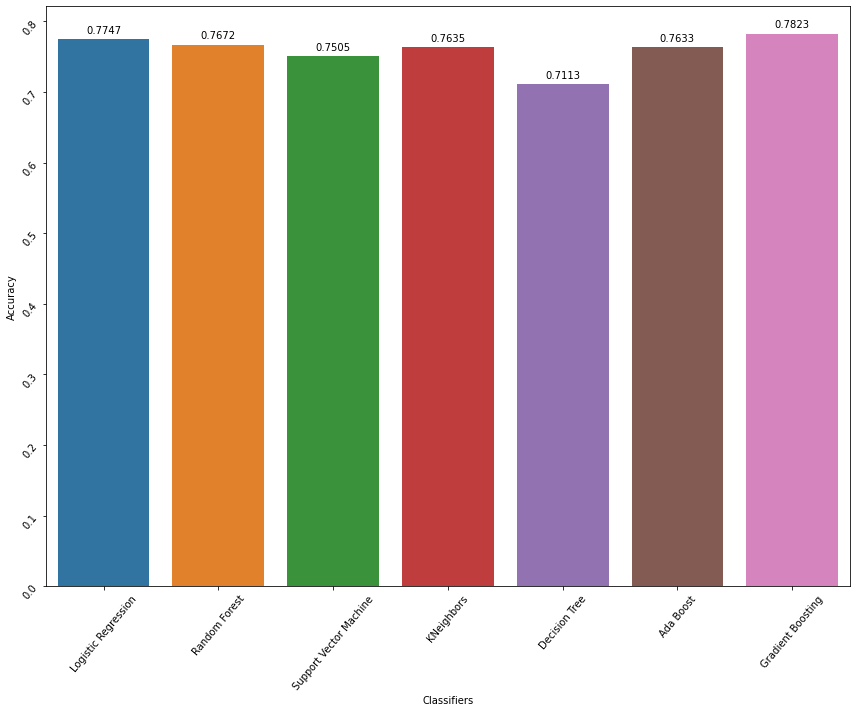

Figure saved


<Figure size 432x288 with 0 Axes>

In [39]:
class_score_df = pd.DataFrame({'Classifier': class_name, 'TrainScore': score})
print(class_score_df)

# From 10 kfold rounds, we can see that the accuracy of around 70-80% on the training data-set, and accuracy of 75-99% on the testing datasets!
# Plotting a histogram of the classifier scores!
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.barplot(x = 'Classifier', y = 'TrainScore', data = class_score_df)
ax.set(xlabel='Classifiers', ylabel='Accuracy')   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.009, '{:1.4f}'.format(height), ha="center")
    ax.tick_params(rotation=50)
plt.tight_layout()
plt.show()
save_fig("Classifier scores")

In [40]:
clf_DT = DecisionTreeClassifier(random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.7189028651292801
Decision Tree (stand alone) - Test :  0.6883116883116883


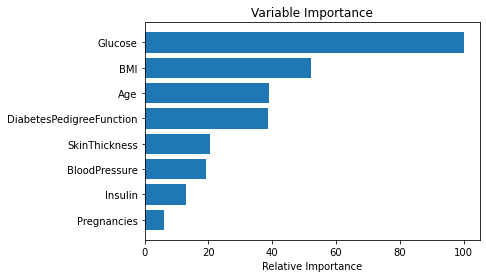

In [41]:
# Feature Importance based on Decision Tree
feature_importance = clf_DT.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [42]:
clf_RF = RandomForestClassifier(n_estimators = 100, random_state=2023).fit(X_train,y_train)
results = cross_val_score(clf_RF, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.7708595387840671
Decision Tree (stand alone) - Test :  0.7532467532467533


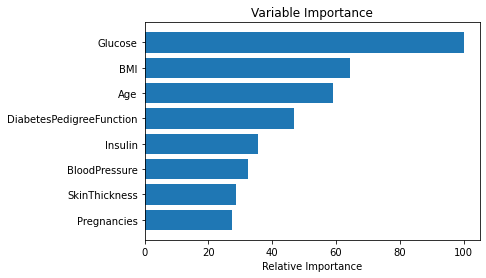

In [43]:
# Feature Importance based on Random Forest
feature_importance = clf_RF.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [44]:
# We are getting accuracy of ~70-78% using the above classifiers!
# Let's take the top 4 classifier and make their confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

10-fold Kross validation:

Train cv accuracy:   0.77 (+/- 0.05) [Logistic Regression]
Test accuracy    :   0.77
Predicted    0   1  All
True                   
0          128  23  151
1           31  49   80
All        159  72  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.61      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



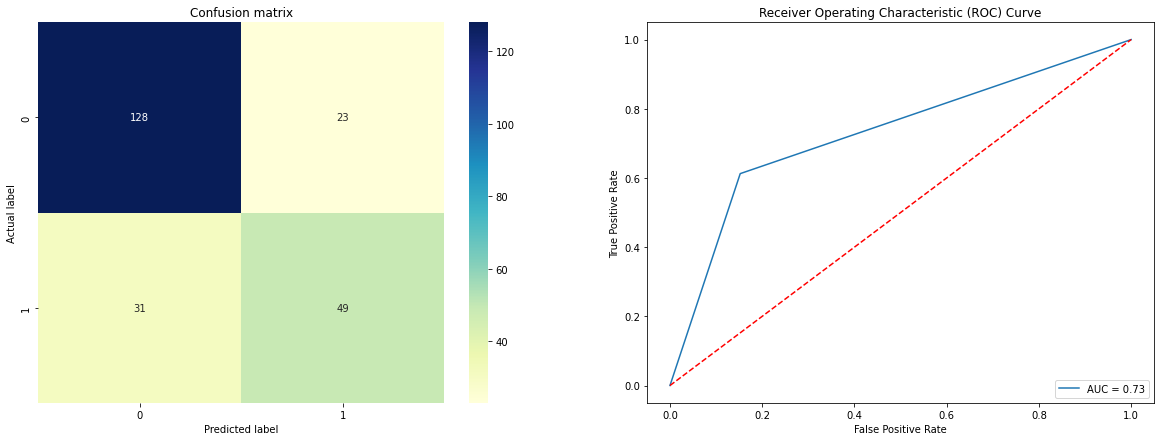

Train cv accuracy:   0.77 (+/- 0.04) [Random Forest]
Test accuracy    :   1.00
Predicted    0   1  All
True                   
0          151   0  151
1            0  80   80
All        151  80  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        80

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



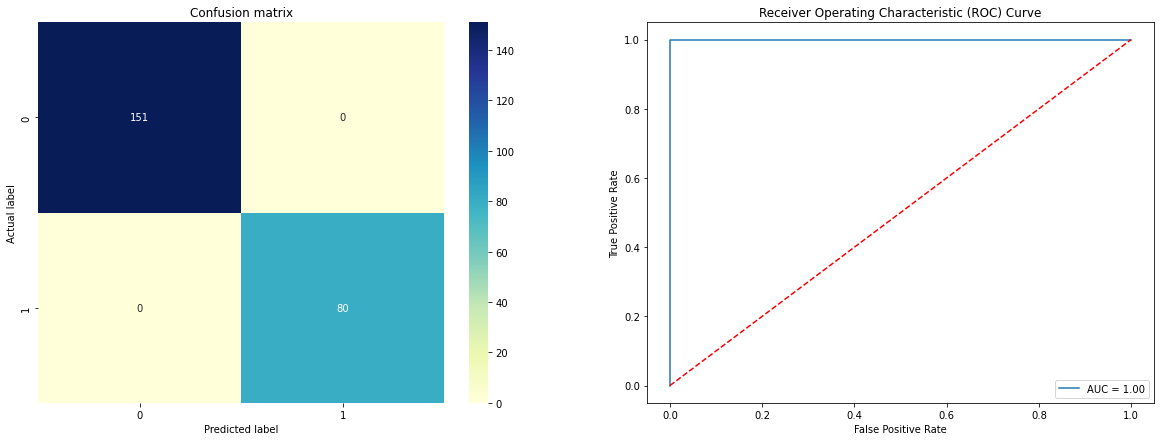

Train cv accuracy:   0.75 (+/- 0.05) [Support Vector Machine]
Test accuracy    :   0.82
Predicted    0   1  All
True                   
0          137  14  151
1           27  53   80
All        164  67  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       151
           1       0.79      0.66      0.72        80

    accuracy                           0.82       231
   macro avg       0.81      0.78      0.80       231
weighted avg       0.82      0.82      0.82       231



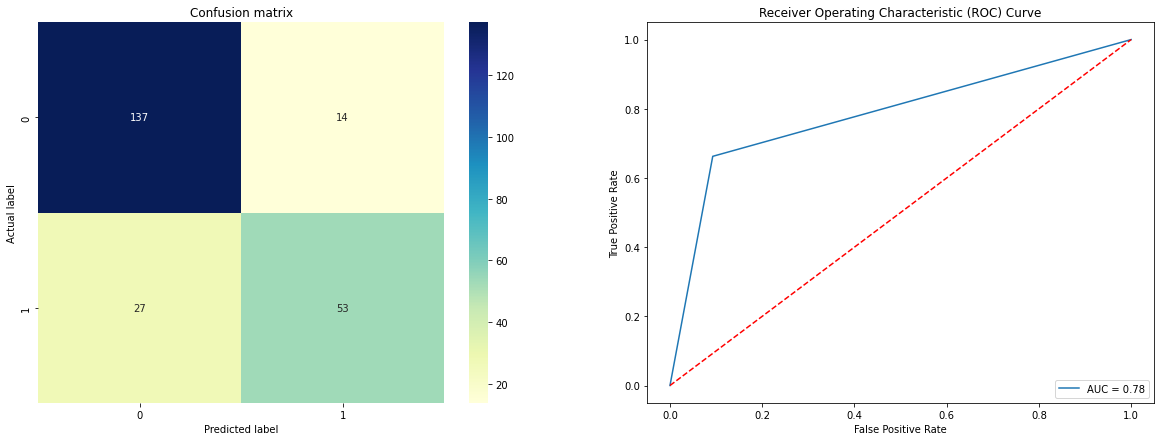

Train cv accuracy:   0.78 (+/- 0.04) [Gradient Boosting]
Test accuracy    :   0.90
Predicted    0   1  All
True                   
0          142   9  151
1           15  65   80
All        157  74  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       151
           1       0.88      0.81      0.84        80

    accuracy                           0.90       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.90      0.90      0.90       231



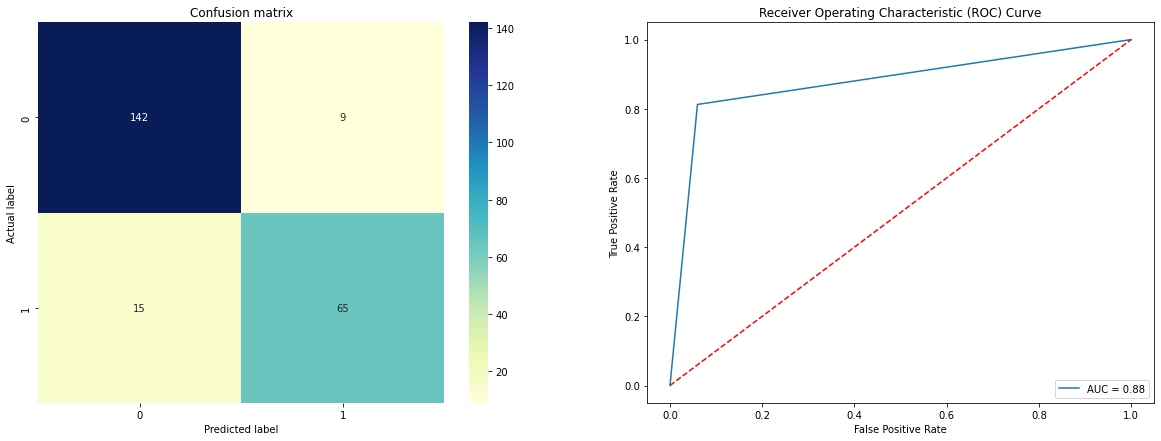

In [45]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=41) # 10 number of iterartions

class_name = []
score = []
clfs = []
class_score_df = pd.DataFrame()

print('10-fold Kross validation:\n')
for clf, label in zip([LR, RF, SVM, GBC], ['Logistic Regression', 
                                                              'Random Forest', 
                                                              'Support Vector Machine',                                             
                                                              'Gradient Boosting']):
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Train cv accuracy:   %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label))
    md = clf.fit(X, y)
    clfs.append(md)
    y_pred = clf.predict(X_test)
    print("Test accuracy    :   %0.2f" %(metrics.accuracy_score(y_pred, y_test)))
    class_name.append(label)
    score.append(scores.mean())
    
    confusion_matrix(y_test,y_pred)
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    print('\nClassification report(for Test set only)\n', classification_report(y_test,y_pred))
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict(X_test))
    auc_score = metrics.auc(fpr, tpr)
    
    fig, ax = plt.subplots(1,2, figsize=(20, 7))
    sns.heatmap(pd.DataFrame(cnf_matrix), ax=ax[0], annot=True, cmap="YlGnBu" ,fmt='g').set(xlabel='Predicted label', ylabel='Actual label', title='Confusion matrix')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [46]:
# let's try Boosting with Logistic Regression and Gradient Boosting as base models
from sklearn.ensemble import AdaBoostClassifier

# Using Logistic Regression as Base model
X = df.drop('Outcome', axis=1)
y = df.Outcome

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70%->Training, 30%->Testing

In [47]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = cross_val_score(model, X_train, y_train, cv=kfold)
y_pred = model.predict(X_test)
print ("Logistic Regression (stand alone) - Train : ", results.mean())
print ("Logistic Regression (stand alone) - Test  : ", metrics.accuracy_score(model.predict(X_test), y_test))

confusion_matrix(y_test, y_pred)
print('\n', pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('\nClassification report(for Test set only)\n', classification_report(y_test, y_pred))

Logistic Regression (stand alone) - Train :  0.7690204222914503
Logistic Regression (stand alone) - Test  :  0.7402597402597403

 Predicted    0   1  All
True                   
0          124  27  151
1           33  47   80
All        157  74  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [48]:
clf_Boost = AdaBoostClassifier(base_estimator=model, n_estimators=200, learning_rate=0.1).fit(X_train, y_train)
results = cross_val_score(clf_Boost, X_train, y_train, cv=kfold)

y_pred = clf_Boost.predict(X_test)

print ("LogisticRegression (Ada Boost) - Train : ", results.mean())
print ("LogisticRegression (Ada Boost) - Test  : ", metrics.accuracy_score(clf_Boost.predict(X_test), y_test))

confusion_matrix(y_test, y_pred)
print('\n', pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('\nClassification report(for Test set only)\n', classification_report(y_test, y_pred))

LogisticRegression (Ada Boost) - Train :  0.7765143648321218
LogisticRegression (Ada Boost) - Test  :  0.7402597402597403

 Predicted    0   1  All
True                   
0          124  27  151
1           33  47   80
All        157  74  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [49]:
# Using Gradient Boost as Base model
X = df.drop('Outcome', axis=1)
y = df.Outcome

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70%->Training, 30%->Testing

In [50]:
model = GradientBoostingClassifier()
model = model.fit(X_train, y_train)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = cross_val_score(model, X_train, y_train, cv=kfold)
y_pred = model.predict(X_test)
print ("Gradient Boosting (stand alone) - Train : ", results.mean())
print ("Gradient Boosting (stand alone) - Test  : ", metrics.accuracy_score(model.predict(X_test), y_test))

confusion_matrix(y_test, y_pred)
print('\n', pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('\nClassification report(for Test set only)\n', classification_report(y_test, y_pred))

Gradient Boosting (stand alone) - Train :  0.7895465559016961
Gradient Boosting (stand alone) - Test  :  0.7142857142857143

 Predicted    0   1  All
True                   
0          114  37  151
1           29  51   80
All        143  88  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.58      0.64      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.72       231



In [51]:
clf_Boost = AdaBoostClassifier(base_estimator=model, n_estimators=200, learning_rate=0.1).fit(X_train, y_train)
results = cross_val_score(clf_Boost, X_train, y_train, cv=kfold)

y_pred = clf_Boost.predict(X_test)

print ("Gradient Boosting(Ada Boost) - Train : ", results.mean())
print ("Gradient Boosting (Ada Boost) - Test  : ", metrics.accuracy_score(clf_Boost.predict(X_test), y_test))

confusion_matrix(y_test, y_pred)
print('\n', pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('\nClassification report(for Test set only)\n', classification_report(y_test, y_pred))

Gradient Boosting(Ada Boost) - Train :  0.7765143648321218
Gradient Boosting (Ada Boost) - Test  :  0.7445887445887446

 Predicted    0   1  All
True                   
0          118  33  151
1           26  54   80
All        144  87  231

Classification report(for Test set only)
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [52]:
# Let's do stacking!
X = df.drop('Outcome', axis=1)
y = df.Outcome

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
num_trees = 10
verbose = True

In [53]:
clfs = [LogisticRegression(),
 RandomForestClassifier(n_estimators=num_trees, random_state=2023),
 GradientBoostingClassifier(n_estimators=num_trees, random_state=2023)]

In [54]:
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))

In [55]:
print('10-fold cross validation:\n')
for i, clf in enumerate(clfs):
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    print("##### Base Model %0.0f #####" % i)
    print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    clf.fit(X_train, y_train)
    print("Train Accuracy:    %0.2f " % (metrics.accuracy_score(clf.predict(X_train), y_train)))
    dataset_blend_train[:,i] = clf.predict_proba(X_train)[:, 1]
    dataset_blend_test[:,i] = clf.predict_proba(X_test)[:, 1]
    print("Test Accuracy:     %0.2f " % (metrics.accuracy_score(clf.predict(X_test), y_test)))
    
print ("\n##### Meta Model #####")
clf = LogisticRegression()
scores = cross_val_score(clf, dataset_blend_train, y_train, cv=kfold, scoring='accuracy')
clf.fit(dataset_blend_train, y_train)

print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Train Accuracy:    %0.2f " % (metrics.accuracy_score(clf.predict(dataset_blend_train), y_train)))
print("Test Accuracy:     %0.2f " % (metrics.accuracy_score(clf.predict(dataset_blend_test), y_test)))

10-fold cross validation:

##### Base Model 0 #####
Train CV Accuracy: 0.77 (+/- 0.04)
Train Accuracy:    0.78 
Test Accuracy:     0.74 
##### Base Model 1 #####
Train CV Accuracy: 0.73 (+/- 0.01)
Train Accuracy:    0.98 
Test Accuracy:     0.74 
##### Base Model 2 #####
Train CV Accuracy: 0.76 (+/- 0.02)
Train Accuracy:    0.80 
Test Accuracy:     0.75 

##### Meta Model #####
Train CV Accuracy: 0.98 (+/- 0.01)
Train Accuracy:    0.98 
Test Accuracy:     0.74 


Train Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       353
           1       0.96      0.98      0.97       184

    accuracy                           0.98       537
   macro avg       0.98      0.98      0.98       537
weighted avg       0.98      0.98      0.98       537


 Predicted    0    1  All
True                    
0          346    3  349
1            7  181  188
All        353  184  537


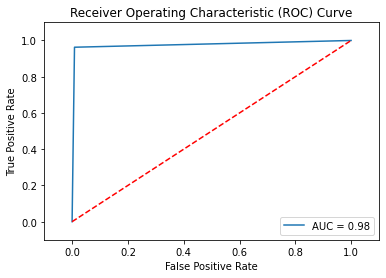

In [56]:
print("Train Classification report: \n", metrics.classification_report(clf.predict(dataset_blend_train), y_train))
confusion_matrix(y_train, clf.predict(dataset_blend_train))
print('\n', pd.crosstab(y_train, clf.predict(dataset_blend_train), rownames=['True'], colnames=['Predicted'], margins=True))

fpr, tpr, _ = metrics.roc_curve(y_train, clf.predict(dataset_blend_train))
auc_score = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

Test Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       148
           1       0.65      0.63      0.64        83

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231


 Predicted    0   1  All
True                   
0          120  31  151
1           28  52   80
All        148  83  231


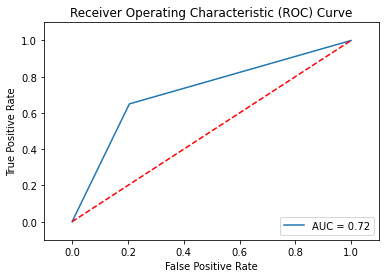

In [57]:
print("Test Classification report: \n", metrics.classification_report(clf.predict(dataset_blend_test), y_test))
confusion_matrix(y_test, clf.predict(dataset_blend_test))
print('\n', pd.crosstab(y_test, clf.predict(dataset_blend_test), rownames=['True'], colnames=['Predicted'], margins=True))

fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict(dataset_blend_test))
auc_score = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

10-fold cross validation:

Train CV Accuracy:  0.77 (+/- 0.05) [Ensemble Hard Voting]
Test accuracy: 0.91 
Predicted    0   1  All
True                   
0          118  33  151
1           26  54   80
All        144  87  231

Classification report(for Test set only):
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



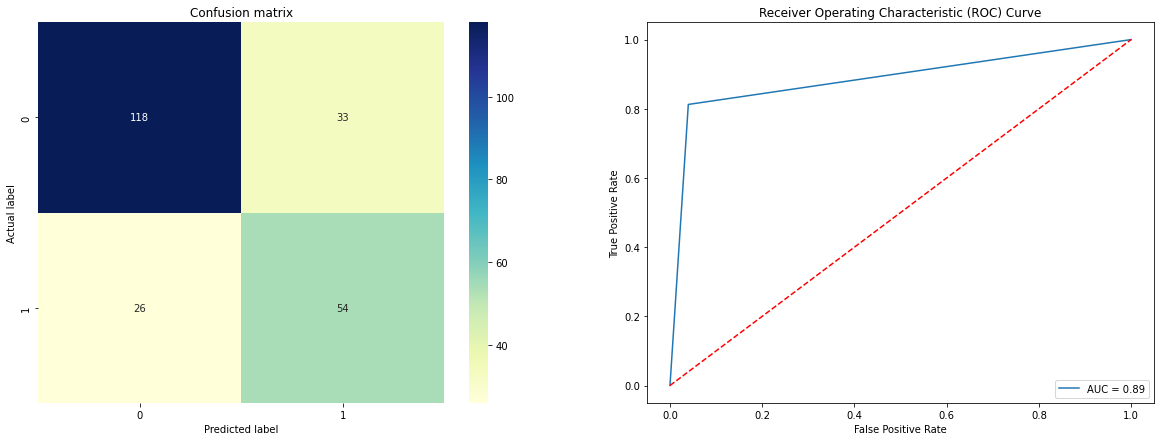

Train CV Accuracy:  0.78 (+/- 0.06) [Ensemble Soft Voting]
Test accuracy: 0.94 
Predicted    0   1  All
True                   
0          118  33  151
1           26  54   80
All        144  87  231

Classification report(for Test set only):
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



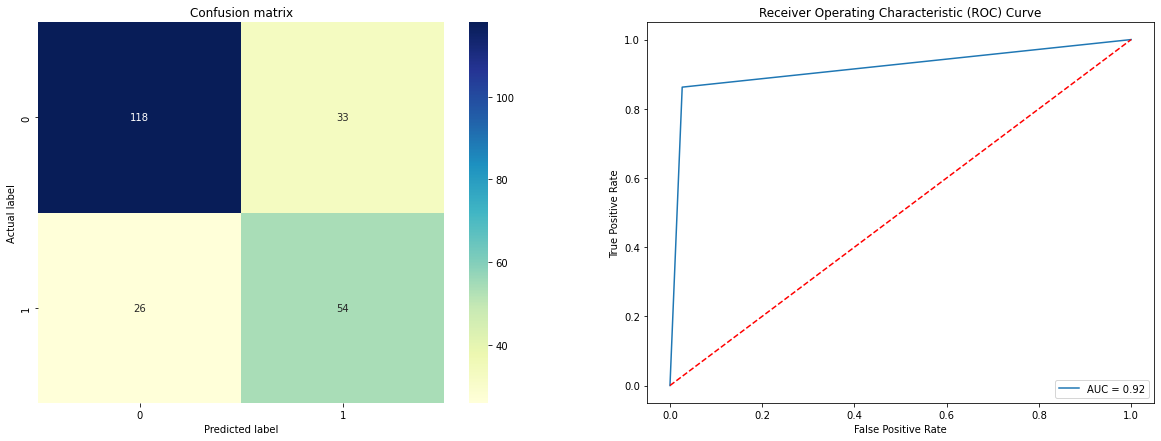

In [58]:
clfs = []
print("10-fold cross validation:\n")

ECH = EnsembleVoteClassifier(clfs=[LR, RF, GBC], voting='hard') #Hard-Voting
ECS = EnsembleVoteClassifier(clfs=[LR, RF, GBC], voting='soft', weights=[1,1,1]) #Soft-Voting

for clf, label in zip([ECH, ECS], ['Ensemble Hard Voting', 'Ensemble Soft Voting']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Train CV Accuracy:  %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label))
    md = clf.fit(X, y)
    clfs.append(md)
    print("Test accuracy: %0.2f " %(metrics.accuracy_score(clf.predict(X_test), y_test)))
    
    confusion_matrix(y_test,y_pred)
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    print('\nClassification report(for Test set only):\n', classification_report(y_test,y_pred))
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict(X_test))
    auc_score = metrics.auc(fpr, tpr)
    
    fig, ax = plt.subplots(1,2, figsize=(20, 7))
    sns.heatmap(pd.DataFrame(cnf_matrix), ax=ax[0], annot=True, cmap="YlGnBu" ,fmt='g').set(xlabel='Predicted label', ylabel='Actual label', title='Confusion matrix')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [59]:
# Hyperparamter Tuning using Grid search!
from sklearn.model_selection import GridSearchCV

X = df.iloc[:, :8]
y = df['Outcome']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)
num_tress = 100

clf_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

rf_params = {
 'n_estimators': [100, 250, 500, 750, 1000],
 'criterion': ['gini', 'entropy'],
 'max_features': [None, 'auto', 'sqrt', 'log2'],
 'max_depth': [1, 3, 5, 7, 9]
}

In [60]:
grid = GridSearchCV(clf_rf, rf_params, scoring='roc_auc', cv=kfold, verbose=10, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=41, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500, 750, 1000]},
             scoring='roc_auc', verbose=10)

In [61]:
print ('Best Parameters: ', grid.best_params_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}


In [62]:
results = cross_val_score(grid.best_estimator_, X_train, y_train, cv=kfold)
print ("Accuracy - Train CV:   ", results.mean())
print ("Accuracy - Train:      ", metrics.accuracy_score(grid.best_estimator_.predict(X_train), y_train))
print ("Accuracy - Test:       ", metrics.accuracy_score(grid.best_estimator_.predict(X_test), y_test))

Accuracy - Train CV:    0.775171866737176
Accuracy - Train:       0.8599348534201955
Accuracy - Test:        0.7402597402597403


In [63]:
# Conclusion
# After EDA and preprocessing, three ensamble models were run and the performance was verified with the validation dataset. Ensamble using soft and hard voting gave the best result in solving this problem, but different results may come out depending on preprocessing and selection of base models and hyperparameter settings.**